## CM50266 Applied Data Science
## Lab 1: Weather Visualisation

## Task 1


1. Parse the CSV file.
2. Read the data.
3. Handling missing data.
4. Compute the minimum, maximum, mean and standard deviation for each component of  the weather data.
5. Plot pairs of the data or write out a suitable CSV file.
6. Check correlations between the weather components visually.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from datetime import timedelta
from pandas.plotting import scatter_matrix

### 1. Parse the CSV file.
### 2. Read the data

In [2]:
bar = pd.read_csv('barometer-last-year.csv')
indoor_temp = pd.read_csv('indoor-temperature-last-year.csv')
outside_temp = pd.read_csv('outside-temperature-last-year.csv')
rainfall = pd.read_csv('rainfall-last-year.csv')

In [3]:
# Renaming columns
bar = bar.rename({"Bar":"Atmospheric Pressure (hPa)"})
rainfall = rainfall.rename({"mm":"Precipitation (mm)"})
indoor_temp = indoor_temp.rename({"Temperature":"Indoor_T","Temperature_range (low)":"Indoor_TR_Low", "Temperature_range (high)":"Indoor_TR_High"}, axis='columns') 
outside_temp = outside_temp.rename({"Temperature":"Outside_T","Temperature_range (low)":"Outside_TR_Low", "Temperature_range (high)":"Outside_TR_High"}, axis='columns') 

### 3. Handling missing data

In [4]:
# To re-use the core parser create a function
# Transform the dataset to the new dataset with adding missing dates

def add_missing_dates(df):
    first_date = df.DateTime.min()
    last_date = df.DateTime.max()
    all_days = pd.date_range(first_date, last_date, freq='D')
    full_days = pd.DataFrame(all_days, columns=['Date'])
    # df.dtypes : confirm the type of dataset
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df2 = pd.merge(full_days,
                  df,
                  left_on ='Date',
                  right_on = 'DateTime',
                  how = 'left')
    return df2.drop('DateTime', axis=1)

# Use the function for the data
full_bar = add_missing_dates(bar)
full_indoor = add_missing_dates(indoor_temp)
full_outside = add_missing_dates(outside_temp)
full_rainfall = add_missing_dates(rainfall)

### 4. Compute the minimum, maximum, mean and standard deviation for each component of the weather data.

In [5]:
# Baroeter
bar_values = full_bar.loc[:, full_bar.columns[1]]
bar_min = bar_values.min()
bar_max = bar_values.max()
bar_mean = bar_values.mean()
bar_sd = bar_values.std()

print('BAROMETER')
print(f'The minimum value of {full_bar.columns[1]} ==> {bar_min}')
print(f'The maximum value of {full_bar.columns[1]} ==> {bar_max}')
print(f'The mean value of {full_bar.columns[1]} ==> {bar_mean}')
print(f'The standard deviation value of {full_bar.columns[1]} ==> {bar_sd}')

# Rainfall data
rainfall_values = full_rainfall.loc[:, full_rainfall.columns[1]]
rainfall_min = rainfall_values.min()
rainfall_max = rainfall_values.max()
rainfall_mean = rainfall_values.mean()
rainfall_sd = rainfall_values.std()

print()
print('RAINFALL')
print(f'The minimum value of {full_rainfall.columns[1]} ==> {rainfall_min}')
print(f'The maximum value of {full_rainfall.columns[1]} ==> {rainfall_max}')
print(f'The mean value of {full_rainfall.columns[1]} ==> {rainfall_mean}')
print(f'The standard deviation value of {full_rainfall.columns[1]} ==> {rainfall_sd}')

# Indoor temperature data
print()
print("INDOOR TEMPERATURE")
for col in range(1, len(full_indoor.columns)):
    id_temp_values = full_indoor.loc[:, full_indoor.columns[col]]
    print(f'The minimum value of {full_indoor.columns[col]} ==> {id_temp_values.min()}')
    print(f'The maximum value of of {full_indoor.columns[col]} ==> {id_temp_values.max()}')
    print(f'The mean value of of {full_indoor.columns[col]} ==> {id_temp_values.mean()}')
    print(f'The standard deviation value of {full_indoor.columns[col]} ==> {id_temp_values.std()}')
    
# Outside temperature data
print()
print("OUTSIDE TEMPERATURE")
for col in range(1, len(outside_temp.columns)):
    od_temp_values = full_outside.loc[:, full_outside.columns[col]]
    print(f'The minimum value of {full_outside.columns[col]} ==> {od_temp_values.min()}')
    print(f'The maximum value of {full_outside.columns[col]} ==> {od_temp_values.max()}')
    print(f'The mean value of {full_outside.columns[col]} ==> {od_temp_values.mean()}')
    print(f'The standard deviation value of {full_outside.columns[col]} ==> {od_temp_values.std()}')

BAROMETER
The minimum value of Baro ==> 979.6
The maximum value of Baro ==> 1035.6
The mean value of Baro ==> 1009.9988732394369
The standard deviation value of Baro ==> 9.869661833899114

RAINFALL
The minimum value of mm ==> 0.0
The maximum value of mm ==> 23.2
The mean value of mm ==> 1.5487252124645903
The standard deviation value of mm ==> 3.3245992266778948

INDOOR TEMPERATURE
The minimum value of Humidity ==> 37.0
The maximum value of of Humidity ==> 59.0
The mean value of of Humidity ==> 48.51977401129943
The standard deviation value of Humidity ==> 5.188885916963858
The minimum value of Indoor_T ==> 18.04
The maximum value of of Indoor_T ==> 29.21
The mean value of of Indoor_T ==> 21.827884887005663
The standard deviation value of Indoor_T ==> 2.058307232296944
The minimum value of Indoor_TR_Low ==> 14.9
The maximum value of of Indoor_TR_Low ==> 28.2
The mean value of of Indoor_TR_Low ==> 20.555932203389844
The standard deviation value of Indoor_TR_Low ==> 2.405124688229042
The

### 5. Plot pairs of the data or write out a suitable CSV file.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


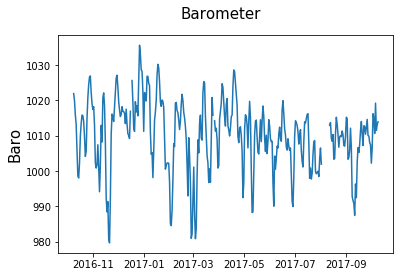

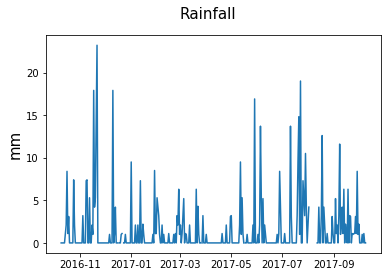

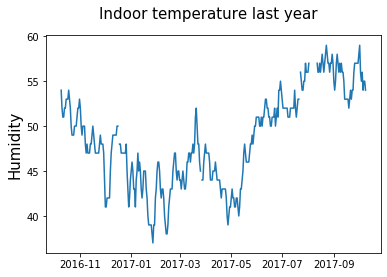

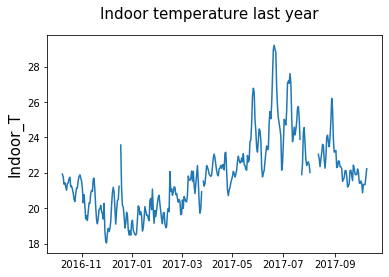

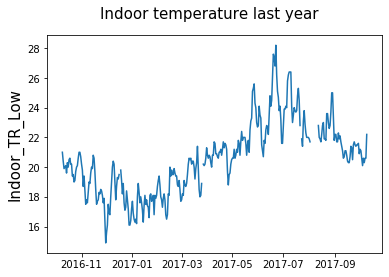

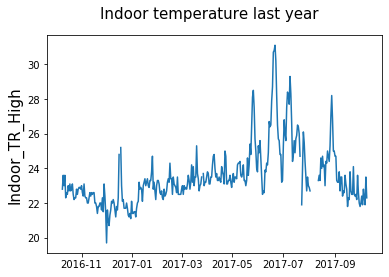

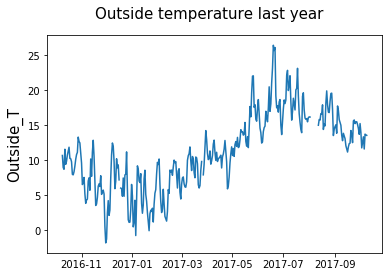

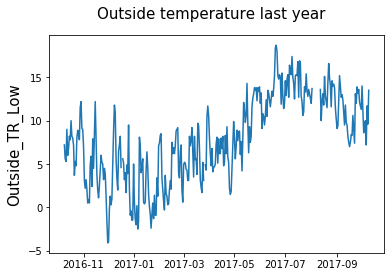

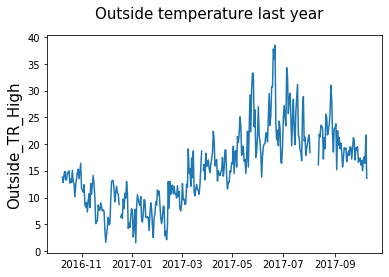

In [6]:
# Plot pairs

# Barometer data
plt.figure()
plt.plot(full_bar.iloc[:, 0], full_bar.iloc[:, 1])
plt.ylabel(bar.columns[1], fontsize=15)
plt.suptitle('Barometer', fontsize=15)

# Rainfall data
plt.figure()
plt.plot(full_rainfall.iloc[:, 0], full_rainfall.iloc[:, 1])
plt.ylabel(full_rainfall.columns[1], fontsize=15)
plt.suptitle('Rainfall', fontsize=15)

# Indoor temperature

for col_in in range(1, len(full_indoor.columns)):
    plt.figure()
    plt.plot(full_indoor.iloc[:, 0], full_indoor.iloc[:, col_in])
    plt.ylabel(full_indoor.columns[col_in], fontsize=15)
    plt.suptitle('Indoor temperature last year', fontsize=15)
    
# Outside temperature data
for col_out in range(1, len(full_outside.columns)):
    plt.figure()
    plt.plot(full_outside.iloc[:, 0], full_outside.iloc[:, col_out])
    plt.ylabel(full_outside.columns[col_out], fontsize=15)
    plt.suptitle('Outside temperature last year', fontsize=15)

### 6. Check correlations between the weather components visually.

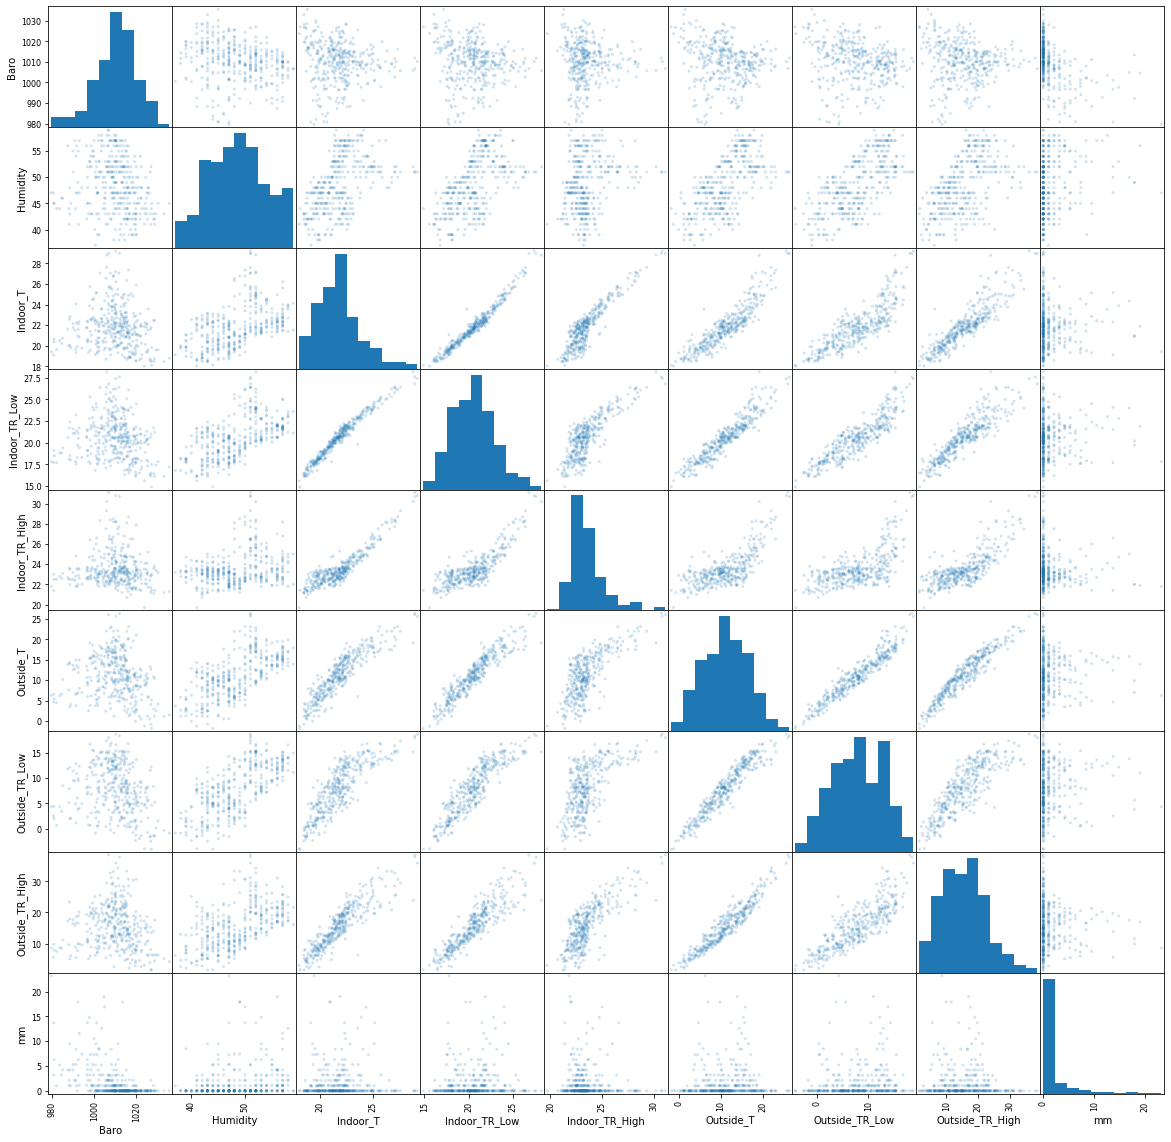

In [7]:
# Use scatter matrix
df = pd.concat([full_bar, full_indoor, full_outside, full_rainfall], axis=1)
all_val = df.drop(df.columns[2], axis=1)

scatter_matrix(all_val, alpha=0.2, figsize = (20,20))
plt.savefig('scatter_matrix.png')
plt.show()

In [8]:
# Calculate Pearson correlation coefficient
pearson_coeff = all_val.corr(method='pearson', min_periods=1)
pearson_coeff

,Baro,Humidity,Indoor_T,Indoor_TR_Low,Indoor_TR_High,Outside_T,Outside_TR_Low,Outside_TR_High,mm
Baro,1.000000,-0.200786,-0.101517,-0.144429,-0.036803,-0.157571,-0.199476,-0.087452,-0.479349
Humidity,-0.200786,1.000000,0.481282,0.570255,0.247138,0.644720,0.690491,0.540705,0.170841
Indoor_T,-0.101517,0.481282,1.000000,0.978688,0.911397,0.902442,0.834862,0.897245,-0.015083
Indoor_TR_Low,-0.144429,0.570255,0.978688,1.000000,0.826338,0.937128,0.894525,0.899350,0.037975
Indoor_TR_High,-0.036803,0.247138,0.911397,0.826338,1.000000,0.734264,0.637049,0.779789,-0.110527
Outside_T,-0.157571,0.644720,0.902442,0.937128,0.734264,1.000000,0.954362,0.952036,0.024175
Outside_TR_Low,-0.199476,0.690491,0.834862,0.894525,0.637049,0.954362,1.000000,0.839464,0.077210
Outside_TR_High,-0.087452,0.540705,0.897245,0.899350,0.779789,0.952036,0.839464,1.000000,-0.062459
mm,-0.479349,0.170841,-0.015083,0.037975,-0.110527,0.024175,0.077210,-0.062459,1.000000


## Task 2


1. Summarise the data monthly.
2. Summarise the data seasonly.
3. Infographics for monthly data
4. Infographics for seasonly data

### 1. Summarise the data monthly. (2 methods)

In [9]:
full_dates = full_bar.loc[:, full_bar.columns[0]]
df = pd.concat([full_dates, all_val], axis=1)
# Add a column which only contains month.
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.to_csv('daily_dataframe.csv')

First method - It is not efficient

In [10]:
# Monthly Rainfall
month_rain_sum = df.groupby('Month')['mm'].sum().rename("sum_rain").reset_index()
month_rain_max = df.groupby('Month')['mm'].max().rename("max_rain").reset_index()
month_rain_min = df.groupby('Month')['mm'].min().rename("min_rain").reset_index()
month_rain_mean = df.groupby('Month')['mm'].mean().rename("mean_rain").reset_index()
month_rain_std = df.groupby('Month')['mm'].std().rename("std_rain").reset_index()

# Monthly Rainfall into one dataframe
month_rain = pd.concat([month_rain_sum, month_rain_max, month_rain_min, month_rain_mean, month_rain_std], axis=1)
month_rain.insert(0, "Month Name", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], True)
month_rain = month_rain.drop(month_rain.columns[1], axis = 1)

#######################################################################################################################################
# Monthly Humidity
month_humidity_sum = df.groupby('Month')['Humidity'].sum().rename("sum_humidity").reset_index()
month_humidity_max = df.groupby('Month')['Humidity'].max().rename("max_humidity").reset_index()
month_humidity_min = df.groupby('Month')['Humidity'].min().rename("min_humidity").reset_index()
month_humidity_mean = df.groupby('Month')['Humidity'].mean().rename("mean_humidity").reset_index()
month_humidity_std = df.groupby('Month')['Humidity'].std().rename("std_humidity").reset_index()

# Monthly Rainfall into one dataframe
month_humidity = pd.concat([month_humidity_sum, month_humidity_max, month_humidity_min, month_humidity_mean, month_humidity_std], axis=1)
month_humidity.insert(0, "Month Name", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], True)
month_humidity = month_humidity.drop(month_humidity.columns[1], axis = 1)

#######################################################################################################################################
# Indoor Temperature
# Monthly Indoor Temperature
month_indoor_T_sum = df.groupby('Month')['Indoor_T'].sum().rename("sum_Indoor_T").reset_index()
month_indoor_T_max = df.groupby('Month')['Indoor_T'].max().rename("max_Indoor_T").reset_index()
month_indoor_T_min = df.groupby('Month')['Indoor_T'].min().rename("min_Indoor_T").reset_index()
month_indoor_T_mean = df.groupby('Month')['Indoor_T'].mean().rename("mean_Indoor_T").reset_index()
month_indoor_T_std = df.groupby('Month')['Indoor_T'].std().rename("std_Indoor_T").reset_index()

# Monthly Indoor Temperature into one dataframe
month_Indoor_T = pd.concat([month_indoor_T_sum, month_indoor_T_max, month_indoor_T_min, month_indoor_T_mean, month_indoor_T_std], axis=1)
month_Indoor_T.insert(0, "Month Name", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], True)
month_Indoor_T = month_Indoor_T.drop(month_Indoor_T.columns[1], axis = 1)

#######################################################################################################################################
# Indoor Temperature Low
# Monthly Indoor Temperature Low
month_Indoor_TR_Low_sum = df.groupby('Month')['Indoor_TR_Low'].sum().rename("sum_Indoor_TR_Low").reset_index()
month_Indoor_TR_Low_max = df.groupby('Month')['Indoor_TR_Low'].max().rename("max_Indoor_TR_Low").reset_index()
month_Indoor_TR_Low_min = df.groupby('Month')['Indoor_TR_Low'].min().rename("min_Indoor_TR_Low").reset_index()
month_Indoor_TR_Low_mean = df.groupby('Month')['Indoor_TR_Low'].mean().rename("mean_Indoor_TR_Low").reset_index()
month_Indoor_TR_Low_std = df.groupby('Month')['Indoor_TR_Low'].std().rename("std_Indoor_TR_Low").reset_index()

# Monthly Indoor Temperature Low into one dataframe
month_Indoor_TR_Low = pd.concat([month_Indoor_TR_Low_sum, month_Indoor_TR_Low_max, month_Indoor_TR_Low_min, month_Indoor_TR_Low_mean, month_Indoor_TR_Low_std], axis=1)
month_Indoor_TR_Low.insert(0, "Month Name", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], True)
month_Indoor_TR_Low = month_Indoor_TR_Low.drop(month_Indoor_TR_Low.columns[1], axis = 1)

#######################################################################################################################################
# Indoor Temperature High
# Monthly Indoor Temperature High
month_Indoor_TR_High_sum = df.groupby('Month')['Indoor_TR_High'].sum().rename("sum_Indoor_TR_High").reset_index()
month_Indoor_TR_High_max = df.groupby('Month')['Indoor_TR_High'].max().rename("max_Indoor_TR_High").reset_index()
month_Indoor_TR_High_min = df.groupby('Month')['Indoor_TR_High'].min().rename("min_Indoor_TR_High").reset_index()
month_Indoor_TR_High_mean = df.groupby('Month')['Indoor_TR_High'].mean().rename("mean_Indoor_TR_High").reset_index()
month_Indoor_TR_High_std = df.groupby('Month')['Indoor_TR_High'].std().rename("std_Indoor_TR_High").reset_index()

# Monthly Indoor Temperature High into one dataframe
month_Indoor_TR_High = pd.concat([month_Indoor_TR_High_sum, month_Indoor_TR_High_max, month_Indoor_TR_High_min, month_Indoor_TR_High_mean, month_Indoor_TR_High_std], axis=1)
month_Indoor_TR_High.insert(0, "Month Name", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], True)
month_Indoor_TR_High = month_Indoor_TR_High.drop(month_Indoor_TR_High.columns[1], axis = 1)

#######################################################################################################################################
# Outside Temperature
# Monthly Outside Temperature
month_Outside_T_sum = df.groupby('Month')['Outside_T'].sum().rename("sum_Outside_T").reset_index()
month_Outside_T_max = df.groupby('Month')['Outside_T'].max().rename("max_Outside_T").reset_index()
month_Outside_T_min = df.groupby('Month')['Outside_T'].min().rename("min_Outside_T").reset_index()
month_Outside_T_mean = df.groupby('Month')['Outside_T'].mean().rename("mean_Outside_T").reset_index()
month_Outside_T_std = df.groupby('Month')['Outside_T'].std().rename("std_Outside_T").reset_index()

# Monthly Indoor Temperature into one dataframe
month_Outside_T = pd.concat([month_Outside_T_sum, month_Outside_T_max, month_Outside_T_min, month_Outside_T_mean, month_Outside_T_std], axis=1)
month_Outside_T.insert(0, "Month Name", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], True)
month_Outside_T = month_Outside_T.drop(month_Outside_T.columns[1], axis = 1)

#######################################################################################################################################
# Outside Temperature Low
# Monthly Outside Temperature Low
month_Outside_TR_Low_sum = df.groupby('Month')['Outside_TR_Low'].sum().rename("sum_Outside_TR_Low").reset_index()
month_Outside_TR_Low_max = df.groupby('Month')['Outside_TR_Low'].max().rename("max_Outside_TR_Low").reset_index()
month_Outside_TR_Low_min = df.groupby('Month')['Outside_TR_Low'].min().rename("min_Outside_TR_Low").reset_index()
month_Outside_TR_Low_mean = df.groupby('Month')['Outside_TR_Low'].mean().rename("mean_Outside_TR_Low").reset_index()
month_Outside_TR_Low_std = df.groupby('Month')['Outside_TR_Low'].std().rename("std_Outside_Low").reset_index()

# Monthly Outside Temperature Low into one dataframe
month_Outside_TR_Low = pd.concat([month_Outside_TR_Low_sum, month_Outside_TR_Low_max, month_Outside_TR_Low_min, month_Outside_TR_Low_mean, month_Outside_TR_Low_std], axis=1)
month_Outside_TR_Low.insert(0, "Month Name", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], True)
month_Outside_TR_Low = month_Outside_TR_Low.drop(month_Outside_TR_Low.columns[1], axis = 1)

#######################################################################################################################################
# Outside Temperature High
# Monthly Outside Temperature High
month_Outside_TR_High_sum = df.groupby('Month')['Outside_TR_High'].sum().rename("sum_Outside_TR_High").reset_index()
month_Outside_TR_High_max = df.groupby('Month')['Outside_TR_High'].max().rename("max_Outside_TR_High").reset_index()
month_Outside_TR_High_min = df.groupby('Month')['Outside_TR_High'].min().rename("min_Outside_TR_High").reset_index()
month_Outside_TR_High_mean = df.groupby('Month')['Outside_TR_High'].mean().rename("mean_Outside_TR_High").reset_index()
month_Outside_TR_High_std = df.groupby('Month')['Outside_TR_High'].std().rename("std_Outside_TR_High").reset_index()

# Monthly Outside Temperature High into one dataframe
month_Outside_High = pd.concat([month_Outside_TR_High_sum, month_Outside_TR_High_max, month_Outside_TR_High_min, month_Outside_TR_High_mean, month_Outside_TR_High_std], axis=1)
month_Outside_High.insert(0, "Month Name", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], True)
month_Outside_High = month_Outside_High.drop(month_Outside_High.columns[1], axis = 1)

#######################################################################################################################################
# Monthly Barometer
month_barometer_sum = df.groupby('Month')['Baro'].sum().rename("sum_barometer").reset_index()
month_barometer_max = df.groupby('Month')['Baro'].max().rename("max_barometer").reset_index()
month_barometer_min = df.groupby('Month')['Baro'].min().rename("min_barometer").reset_index()
month_barometer_mean = df.groupby('Month')['Baro'].mean().rename("mean_barometer").reset_index()
month_barometer_std = df.groupby('Month')['Baro'].std().rename("std_barometer").reset_index()

# Monthly Barometer into one dataframe
month_baro = pd.concat([month_barometer_sum, month_barometer_max, month_barometer_min, month_barometer_mean, month_barometer_std], axis=1)
month_baro.insert(0, "Month Name", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], True)
month_baro = month_baro.drop(month_baro.columns[1], axis = 1)

In [11]:
# Extract only useful components and its statistics
month_data = pd.concat([month_rain_sum, month_humidity_mean, month_indoor_T_mean, month_Indoor_TR_Low_mean, month_Indoor_TR_High_mean, month_Outside_T_mean, month_Outside_TR_Low_mean, month_Outside_TR_High_mean, month_barometer_mean], axis=1)
month_data.insert(0, "Month Name", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], True)
month_data = month_data.drop(month_data.columns[1], axis = 1)
month_data.to_csv('monthly_summery.csv')

Second method - Faster and efficient

In [12]:
# Set the datetime column as the index
df.index = df['Date'] 

# Group the data by month
monthly =  df.resample('M')

# The mean for each group
mon_mean = monthly.mean()

# The max and min value for each group
mon_max = monthly.max()
mon_max = mon_max.drop('Date', axis=1)
mon_min = monthly.min()
mon_min = mon_min.drop('Date', axis=1)
# The std value for each group
mon_std = monthly.std()


### 2. Summarise the data Seasonly. (2 methods)

First method

In [13]:
### Seosanal

# Group the data by season
seasonaly = df.resample('Q-MAR')

# The mean for each group
seanl_mean = seasonaly.mean()

# The max and min value for each group
seanl_max = seasonaly.max()
seanl_max = seanl_max.drop('Date', axis=1)
seanl_min = seasonaly.min()
seanl_min = seanl_min.drop('Date', axis=1)

# The std for each group
seanl_std = seasonaly.std()

Second method

In [14]:
spring = df[df['Month'].isin([3, 4, 5])]
summer = df[df['Month'].isin([6, 7, 8])]
fall = df[df['Month'].isin([9, 10, 11])]
winter = df[df['Month'].isin([12, 1, 2])]

In [15]:
spring_mean = np.mean(spring)
spring_sum = np.sum(spring)
spring_max = np.max(spring)
spring_min = np.min(spring)
spring_std = np.std(spring)

summer_mean = np.mean(summer)
summer_sum = np.sum(summer)
summer_max = np.max(summer)
summer_min = np.min(summer)
summer_std = np.std(summer)

fall_mean = np.mean(fall)
fall_sum = np.sum(fall)
fall_max = np.max(fall)
fall_min = np.min(fall)
fall_std = np.std(fall)

winter_mean = np.mean(winter)
winter_sum = np.sum(winter)
winter_max = np.max(winter)
winter_min = np.min(winter)
winter_std = np.std(winter)

season_data = pd.concat([spring_mean, summer_mean, fall_mean, winter_mean], axis=1)
season_data.to_csv('season_summery.csv')
season_data_mat = season_data.as_matrix()
season_data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


,0,1,2,3
Baro,1010.231868,1007.133735,1008.953261,1013.513483
Humidity,45.021978,53.548780,52.021739,43.842697
Indoor_T,22.155824,24.342927,21.187514,19.837303
Indoor_TR_Low,20.860440,23.518293,20.057609,18.030337
Indoor_TR_High,23.792308,25.412195,22.619565,22.483146
Outside_T,11.309011,17.557831,10.515231,5.623371
Outside_TR_Low,7.359341,13.543373,7.702174,3.257303
Outside_TR_High,16.807692,23.506024,14.185870,8.151685
mm,0.890000,2.156627,2.084783,1.088636
Month,4.000000,7.010870,10.000000,5.100000


### 3. Infographics for monthly data

In [16]:
# All graphs are generated by Excel
# Count rainy days in each month

### Counted by excel

# Jan: 10 (days)
# Feb: 13
# Mar: 12
# Apr: 14
# May: 10
# Jun: 11
# Jul: 13
# Aug: 19
# Sep: 24
# Oct: 9
# Nov: 11
# Dec: 19

### 4. Infographics for seasonally data

In [17]:
# Count no rainy days by Season
spring_zeromm = spring[spring['mm'].isin([0])]
summer_zeromm = summer[summer['mm'].isin([0])]
fall_zeromm = fall[fall['mm'].isin([0])]
winter_zeromm = winter[winter['mm'].isin([0])]

In [18]:
# Percentage of rainy days of each month
print((len(spring)-len(spring_zeromm))/len(spring) * 100)
print((len(summer)-len(summer_zeromm))/len(summer) * 100)
print((len(fall)-len(fall_zeromm))/len(fall) * 100)
print((len(winter)-len(winter_zeromm))/len(winter) * 100)

28.26086956521739
46.73913043478261
47.82608695652174
35.55555555555556


In [19]:
### Classify the type of rains
# Spring
light_rain_index = [i for i, val in enumerate(spring["mm"]) if val < 2.5] 
moderate_rain_index = [i for i, val in enumerate(spring["mm"]) if (val > 2.5) and (val <= 7.6)] 
heavy_rain_index = [i for i, val in enumerate(spring["mm"]) if val > 7.6]

# Find the corresponding barometer
light_rain_bar = []
for i in light_rain_index:
    light_rain_bar.append(spring["Baro"][i])
    
moderate_rain_bar = []
for i in moderate_rain_index:
    moderate_rain_bar.append(spring["Baro"][i])
    
heavy_rain_bar = []
for i in heavy_rain_index:
    heavy_rain_bar.append(spring["Baro"][i])
    
print(light_rain_bar)
print()
print(moderate_rain_bar)
print()
print(heavy_rain_bar)

[991.1, 1001.1, 987.9, 998.5, 1008.8, 1005.1, 1013.6, 1015.8, 1009.3, 1008.7, 1022.1, 1025.3, 1025.0, 1015.5, 1010.2, 1004.3, 1002.3, 1000.6, 1008.1, 1020.8, 1015.8, 1014.2, 1012.1, 1008.9, 1000.8, 1001.5, 1014.7, 1016.8, 1019.1, 1024.7, 1023.7, 1019.6, 1015.3, 1012.7, 1018.9, 1020.5, 1012.8, 1011.6, 1009.9, 1012.1, 1015.4, 1015.8, 1024.0, 1028.6, 1028.1, 1024.9, 1021.7, 1018.6, 1009.7, 1008.0, 1012.0, 1012.5, 1010.0, 1005.6, 1011.8, 1015.9, 1015.4, 1012.8, 1006.5, 1014.1, 1019.7, 1015.1, 1000.3, 988.2, 998.9, 1014.1, 1014.4, 1005.3, 1004.8, 1009.5, 1014.5, 1008.3, 1014.2, 1018.4, 1015.4, 1009.1, 1005.5, 1010.1, 1008.5, 1014.5]

[980.8, 983.6, 996.7, 996.8, 1011.3, 992.4, 996.5, 1010.2]

[988.4, 1004.9]


In [20]:
### Classify the type of rains
# Summer
light_rain = []
moderate_rain = []
heavy_rain = []
light_rain_index = [i for i, val in enumerate(summer["mm"]) if val < 2.5] 
moderate_rain_index = [i for i, val in enumerate(summer["mm"]) if (val > 2.5) and (val <= 7.6)] 
heavy_rain_index = [i for i, val in enumerate(summer["mm"]) if val > 7.6]

# Find the corresponding barometer
light_rain_bar = []
for i in light_rain_index:
    light_rain_bar.append(summer["Baro"][i])
    
moderate_rain_bar = []
for i in moderate_rain_index:
    moderate_rain_bar.append(summer["Baro"][i])
    
heavy_rain_bar = []
for i in heavy_rain_index:
    heavy_rain_bar.append(summer["Baro"][i])
    
print(light_rain_bar)
print()
print(moderate_rain_bar)
print()
print(heavy_rain_bar)

[1012.7, 1009.1, 1008.3, 1008.4, 1004.2, 1003.5, 1007.0, 1006.5, 1010.5, 1012.4, 1009.0, 1008.4, 1017.3, 1019.9, 1016.2, 1011.9, 1010.2, 1006.8, 1005.9, 1009.1, 1007.0, 1005.8, 1006.5, 999.2, 998.3, 1009.8, 1014.2, 1013.7, 1012.9, 1011.1, 1007.6, 1010.1, 1011.7, 1005.8, 1002.7, 1013.9, 1013.6, 1014.8, 1016.0, 1016.2, 1008.0, 999.4, 1008.2, 1008.6, 1003.4, 1006.5, 1012.9, 1013.7, 1008.4, 1010.3, 1010.6, 1013.2, 1010.3, 1006.7, 1009.6, 1010.0, 1009.7, 1011.3, 1010.2, 1007.2, 1009.8]

[990.0, 1000.5, 989.9, 1008.4, 997.9, 999.8, 999.2, 999.6, 998.4, 1001.9, 1009.2, 1003.3, 1015.2, 1007.0]

[996.7, 991.3, 1001.1, 1000.8, 997.7, 1004.6, 999.9, 1003.5]


In [21]:
### Classify the type of rains
# Fall

light_rain_index = [i for i, val in enumerate(fall["mm"]) if val < 2.5] 
moderate_rain_index = [i for i, val in enumerate(fall["mm"]) if (val > 2.5) and (val <= 7.6)] 
heavy_rain_index = [i for i, val in enumerate(fall["mm"]) if val > 7.6]

# Find the corresponding barometer
light_rain_bar = []
for i in light_rain_index:
    light_rain_bar.append(fall["Baro"][i])
    
moderate_rain_bar = []
for i in moderate_rain_index:
    moderate_rain_bar.append(fall["Baro"][i])
    
heavy_rain_bar = []
for i in heavy_rain_index:
    heavy_rain_bar.append(fall["Baro"][i])
    
print(light_rain_bar)
print()
print(moderate_rain_bar)
print()
print(heavy_rain_bar)

[1021.9, 1019.9, 1015.8, 1013.2, 1005.9, 998.6, 998.0, 1009.8, 1015.8, 1015.7, 1014.0, 1009.8, 1004.1, 1014.8, 1020.7, 1024.4, 1026.6, 1026.9, 1022.2, 1019.1, 1017.4, 1018.2, 1013.0, 1000.8, 1001.7, 1007.4, 1001.6, 1012.9, 1020.7, 1022.1, 1018.4, 1008.2, 991.9, 1010.3, 1016.1, 1015.3, 1014.0, 1018.0, 1022.3, 1026.3, 1027.1, 1015.2, 1014.8, 1003.8, 1005.9, 1012.1, 991.6, 990.8, 996.3, 1002.3, 1006.6, 1005.2, 1007.5, 1014.0, 1012.8, 1012.5, 1010.4, 1012.4, 1014.6, 1009.9, 1007.4, 1002.2, 1006.6, 1016.2, 1014.9, 1010.6, 1019.2, 1011.5, 1013.1, 1013.9]

[1013.4, 1005.5, 1002.3, 1001.3, 994.1, 1008.2, 988.4, 991.3, 1003.3, 1006.5, 987.4, 992.4, 1011.4, 1010.3, 1007.2, 1010.0]

[1002.2, 992.2, 980.7, 979.6, 992.8, 1008.0]


In [22]:
### Classify the type of rains
# Winter
light_rain = []
moderate_rain = []
heavy_rain = []
light_rain_index = [i for i, val in enumerate(winter["mm"]) if val < 2.5] 
moderate_rain_index = [i for i, val in enumerate(winter["mm"]) if (val > 2.5) and (val <= 7.6)] 
heavy_rain_index = [i for i, val in enumerate(winter["mm"]) if val > 7.6]

# Find the corresponding barometer
light_rain_bar = []
for i in light_rain_index:
    light_rain_bar.append(winter["Baro"][i])
    
moderate_rain_bar = []
for i in moderate_rain_index:
    moderate_rain_bar.append(winter["Baro"][i])
    
heavy_rain_bar = []
for i in heavy_rain_index:
    heavy_rain_bar.append(winter["Baro"][i])
    
print(light_rain_bar)
print()
print(moderate_rain_bar)
print()
print(heavy_rain_bar)

[1023.8, 1019.6, 1017.2, 1015.4, 1016.0, 1018.2, 1016.9, 1016.8, 1016.3, 1017.5, 1013.2, 1010.0, 1009.2, 1016.9, 1025.6, 1019.6, 1012.1, 1011.2, 1016.7, 1018.5, 1015.6, 1025.5, 1035.6, 1033.1, 1028.6, 1028.2, 1022.5, 1022.2, 1021.4, 1019.8, 1026.8, 1026.8, 1024.8, 1024.2, 1011.0, 1004.7, 1005.2, 1005.5, 1014.4, 1016.7, 1020.0, 1027.2, 1030.2, 1029.2, 1025.2, 1019.5, 1018.3, 1020.1, 1019.7, 1018.0, 1009.3, 1000.5, 1001.5, 1002.3, 1002.1, 988.8, 997.3, 1007.7, 1006.9, 1019.2, 1019.4, 1017.1, 1016.5, 1014.4, 1011.7, 1014.0, 1018.9, 1021.7, 1019.9, 1016.6, 1015.0, 1012.6, 1009.1, 1001.7, 992.9, 1009.4, 996.9, 982.1]

[1010.6, 998.1, 996.8, 985.0, 984.5, 1004.2, 980.9]

[1013.4, 1011.2, 1002.2]
